# WeatherPy Analysis

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr
!pip install citipy 

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [54]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [69]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
            
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | mazamari
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | garissa
Processing Record 6 of Set 1 | la palma
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | lasa
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | san patricio
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | poum
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | amapa
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | mehamn
Processing Record 20 of Set 1 | kadykchan
City not found. Skipping...
Processing Record 21 of Set 1 | arraial do ca

Processing Record 36 of Set 4 | luderitz
Processing Record 37 of Set 4 | suratgarh
Processing Record 38 of Set 4 | ponta do sol
Processing Record 39 of Set 4 | moron
Processing Record 40 of Set 4 | ouesso
Processing Record 41 of Set 4 | tuktoyaktuk
Processing Record 42 of Set 4 | raudeberg
Processing Record 43 of Set 4 | simdega
Processing Record 44 of Set 4 | nara
Processing Record 45 of Set 4 | batagay
Processing Record 46 of Set 4 | coyuca
City not found. Skipping...
Processing Record 47 of Set 4 | huarmey
Processing Record 48 of Set 4 | atherton
Processing Record 49 of Set 4 | mullaitivu
City not found. Skipping...
Processing Record 0 of Set 5 | temir
Processing Record 1 of Set 5 | coquimbo
Processing Record 2 of Set 5 | sale
Processing Record 3 of Set 5 | marsabit
Processing Record 4 of Set 5 | shiyan
Processing Record 5 of Set 5 | aswan
Processing Record 6 of Set 5 | cabo san lucas
Processing Record 7 of Set 5 | port hedland
Processing Record 8 of Set 5 | samusu
City not found. S

Processing Record 27 of Set 8 | muscat
Processing Record 28 of Set 8 | karata
Processing Record 29 of Set 8 | natal
Processing Record 30 of Set 8 | amboasary
Processing Record 31 of Set 8 | tual
Processing Record 32 of Set 8 | souillac
Processing Record 33 of Set 8 | lhokseumawe
Processing Record 34 of Set 8 | umm kaddadah
Processing Record 35 of Set 8 | paita
Processing Record 36 of Set 8 | tubuala
Processing Record 37 of Set 8 | jejuri
Processing Record 38 of Set 8 | vestmannaeyjar
Processing Record 39 of Set 8 | lafiagi
Processing Record 40 of Set 8 | nizhniy kuranakh
Processing Record 41 of Set 8 | sibenik
Processing Record 42 of Set 8 | golpayegan
Processing Record 43 of Set 8 | tsabong
Processing Record 44 of Set 8 | bilma
Processing Record 45 of Set 8 | novikovo
Processing Record 46 of Set 8 | imeni poliny osipenko
Processing Record 47 of Set 8 | verkhnetulomskiy
Processing Record 48 of Set 8 | taonan
Processing Record 49 of Set 8 | abaza
Processing Record 0 of Set 9 | alangudi


Processing Record 20 of Set 12 | evensk
Processing Record 21 of Set 12 | constanta
Processing Record 22 of Set 12 | cururupu
Processing Record 23 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 24 of Set 12 | rawson
Processing Record 25 of Set 12 | liusha
Processing Record 26 of Set 12 | alausi
Processing Record 27 of Set 12 | kothen
Processing Record 28 of Set 12 | broome
Processing Record 29 of Set 12 | banda aceh
Processing Record 30 of Set 12 | kampot
Processing Record 31 of Set 12 | vrangel
Processing Record 32 of Set 12 | yulara
Processing Record 33 of Set 12 | itoman
Processing Record 34 of Set 12 | kushmurun
Processing Record 35 of Set 12 | inhambane
Processing Record 36 of Set 12 | scarborough
Processing Record 37 of Set 12 | koson
Processing Record 38 of Set 12 | londoko
Processing Record 39 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 40 of Set 12 | sambava
Processing Record 41 of Set 12 | sirari
Processing Record 42 of Set 12 | kalmu

In [ ]:
city_data_df.to

In [70]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [71]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ribeira grande,38.5167,-28.7000,57.78,90,10,4.00,PT,1674626076
1,mazamari,-11.3258,-74.5308,67.60,97,52,2.08,PE,1674626221
2,mar del plata,-38.0023,-57.5575,67.08,73,100,15.01,AR,1674626123
3,garissa,-0.4536,39.6401,78.87,69,94,5.88,KE,1674626223
4,la palma,33.8464,-118.0467,58.10,83,0,2.06,US,1674626223


In [72]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,57.78,90,10,4.00,PT,1674626076
1,mazamari,-11.3258,-74.5308,67.60,97,52,2.08,PE,1674626221
2,mar del plata,-38.0023,-57.5575,67.08,73,100,15.01,AR,1674626123
3,garissa,-0.4536,39.6401,78.87,69,94,5.88,KE,1674626223
4,la palma,33.8464,-118.0467,58.10,83,0,2.06,US,1674626223


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

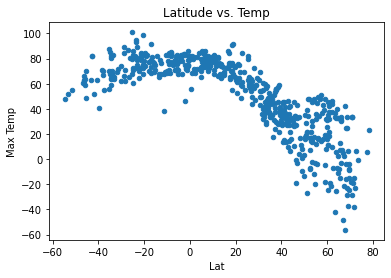

NameError: name 'rvalue' is not defined

In [28]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties

city_data_df.plot.scatter(x="Lat", y="Max Temp",
              title="Latitude vs. Temp")


# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

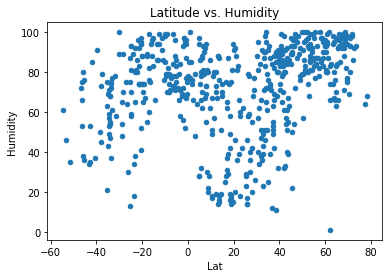

In [5]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x="Lat", y="Humidity",
              title="Latitude vs. Humidity")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

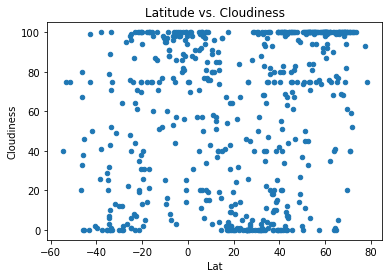

In [6]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x="Lat", y="Cloudiness",
              title="Latitude vs. Cloudiness")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

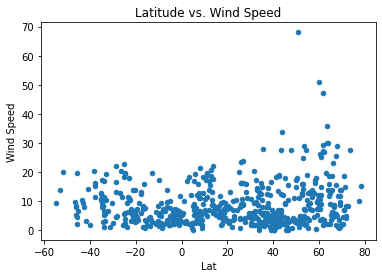

In [7]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x="Lat", y="Wind Speed",
              title="Latitude vs. Wind Speed")


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots

def linear_regression(x, y,z,coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,coord,fontsize=15,color="red")
    plt.xlabel(x.name)
    plt.ylabel(y.name)
    plt.title(z)
    print(rvalue**2)
    plt.show()

In [9]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']>=0),:])

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ribeira grande,38.5167,-28.7000,57.78,90,10,4.00,PT,1674626076
4,la palma,33.8464,-118.0467,58.10,83,0,2.06,US,1674626223
6,lasa,46.6166,10.7002,33.03,72,83,3.04,IT,1674626225
8,san patricio,28.0170,-97.5169,56.84,55,0,15.75,US,1674626226
13,albany,42.6001,-73.9662,31.68,85,69,4.50,US,1674626230


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = pd.DataFrame(city_data_df.loc[(city_data_df['Lat']<0),:])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mazamari,-11.3258,-74.5308,67.60,97,52,2.08,PE,1674626221
2,mar del plata,-38.0023,-57.5575,67.08,73,100,15.01,AR,1674626123
3,garissa,-0.4536,39.6401,78.87,69,94,5.88,KE,1674626223
5,ushuaia,-54.8000,-68.3000,47.86,61,40,9.22,AR,1674626107
7,new norfolk,-42.7826,147.0587,81.88,35,99,8.01,AU,1674626225


###  Temperature vs. Latitude Linear Regression Plot

0.711584686145659


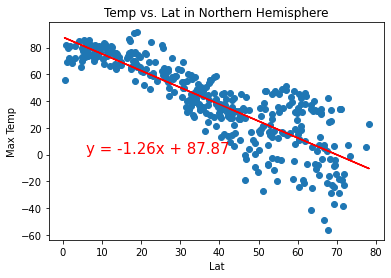

In [49]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
z= "Temp vs. Lat in Northern Hemisphere"
colA = northern_hemi_df['Lat']
colB = northern_hemi_df['Max Temp']
coord= (5.8, 0.8)

linear_regression(x_values, y_values, z, coord)

0.15943151189264657


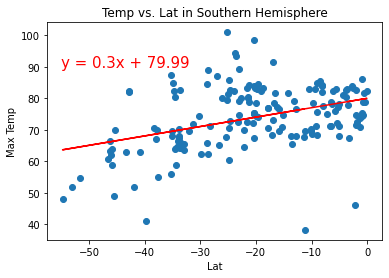

In [50]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
z= "Temp vs. Lat in Southern Hemisphere"
coord = (-55,90)

linear_regression(x_values, y_values, z, coord)

**Discussion about the linear relationship:** As the latitude moves towards zero (the equator) the temperature increases. As such, temperature and latitude can be interpreted as having a negative correlation.

### Humidity vs. Latitude Linear Regression Plot

0.20359567472994616


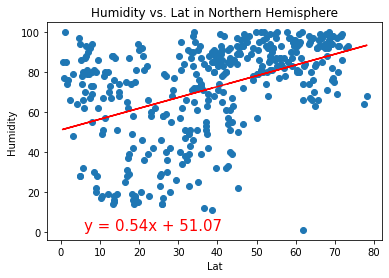

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
z= "Humidity vs. Lat in Northern Hemisphere"
coord= (5.8, 0.8)

linear_regression(x_values, y_values, z, coord)

0.4498862919095712


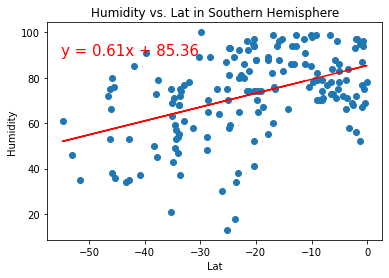

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
z= "Humidity vs. Lat in Southern Hemisphere"
coord = (-55,90)

linear_regression(x_values, y_values, z, coord)

**Discussion about the linear relationship:** As the latitude increases, the humidity also increases. We can conclude that there is a positive correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

0.3048516322274364


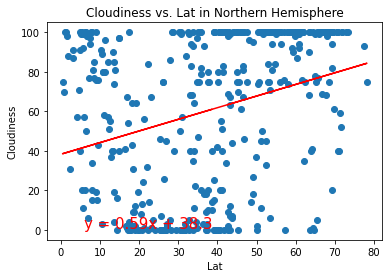

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
z= "Cloudiness vs. Lat in Northern Hemisphere"
coord= (5.8, 0.8)

linear_regression(x_values, y_values, z, coord)


0.4195770859814444


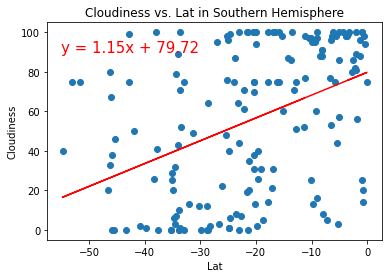

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
z= "Cloudiness vs. Lat in Southern Hemisphere"
coord = (-55,90)

linear_regression(x_values, y_values, z, coord)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

0.022796711204798707


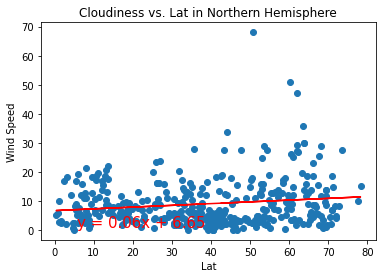

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
z= "Cloudiness vs. Lat in Northern Hemisphere"
coord= (5.8, 0.8)

linear_regression(x_values, y_values, z, coord)

0.13909475141955452


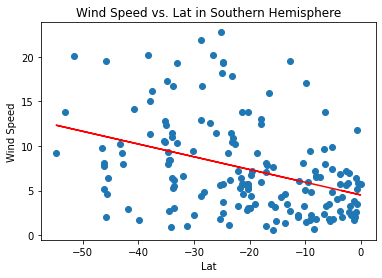

In [53]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
z= "Wind Speed vs. Lat in Southern Hemisphere"
coord = (-55,90)

linear_regression(x_values, y_values, z, coord)

**Discussion about the linear relationship:** YOUR RESPONSE HERE